In [4]:
import cv2
print(cv2.__version__)  # To confirm successful installation and version


4.10.0


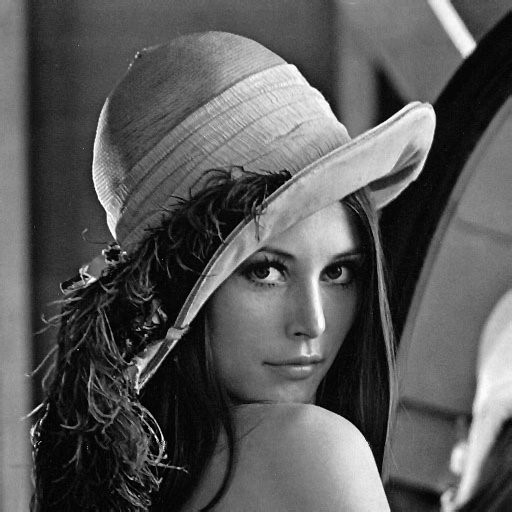

In [12]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img=cv.imread("sample_data/CV lab1 pic.jpg",0)
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

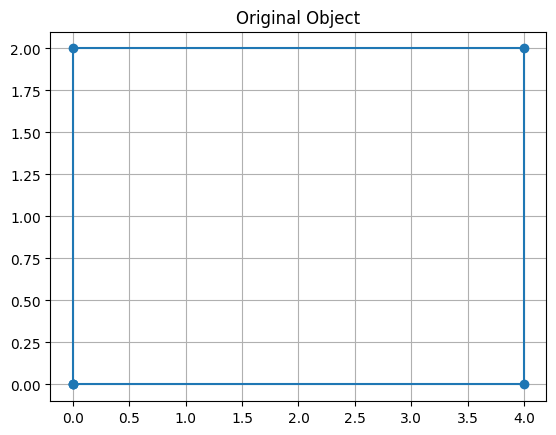

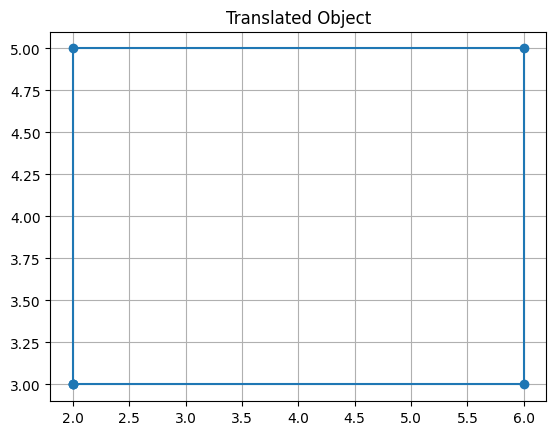

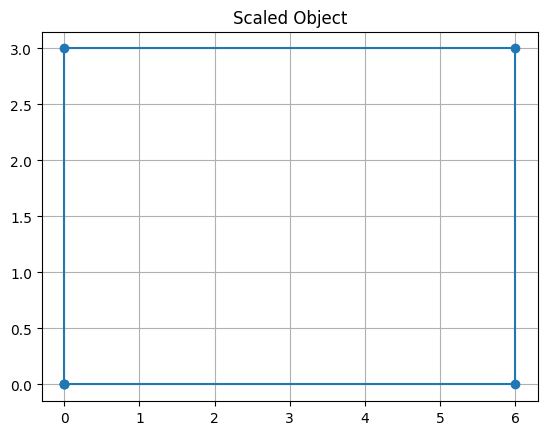

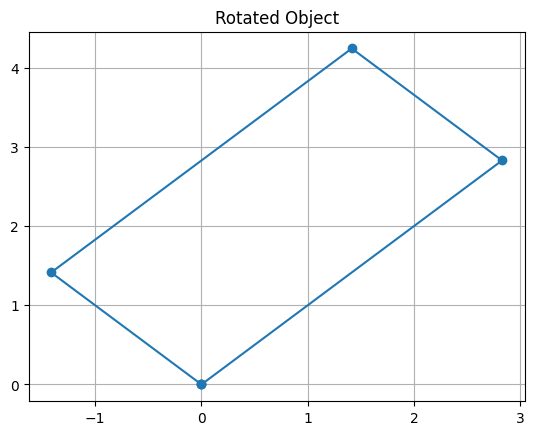

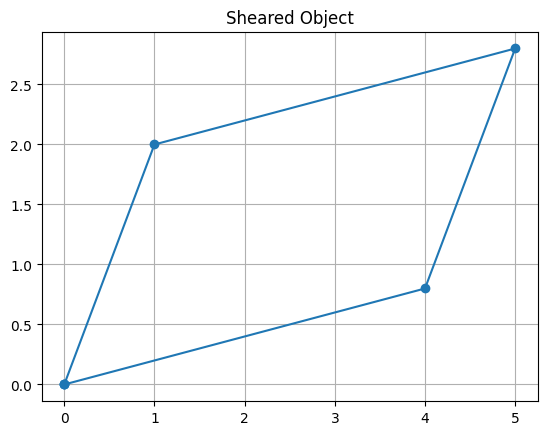

In [16]:
import numpy as np
import matplotlib.pyplot as plt

object_coords = np.array([
    [0, 0],
    [4, 0],
    [4, 2],
    [0, 2],
    [0, 0]
])

def plot_object(coords, title="2D Object"):
    coords = np.vstack([coords, coords[0]])  # Close the polygon
    plt.plot(coords[:, 0], coords[:, 1], marker="o")
    plt.grid()
    plt.title(title)
    plt.show()

plot_object(object_coords, "Original Object")

def translate(coords, tx, ty):
    matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    homogenous_coords = np.hstack([coords, np.ones((coords.shape[0], 1))])
    transformed = homogenous_coords @ matrix.T
    return transformed[:, :2]

def scale(coords, sx, sy):
    matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    homogenous_coords = np.hstack([coords, np.ones((coords.shape[0], 1))])
    transformed = homogenous_coords @ matrix.T
    return transformed[:, :2]

def rotate(coords, angle_deg):
    angle_rad = np.radians(angle_deg)
    matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                       [np.sin(angle_rad), np.cos(angle_rad), 0],
                       [0, 0, 1]])
    homogenous_coords = np.hstack([coords, np.ones((coords.shape[0], 1))])
    transformed = homogenous_coords @ matrix.T
    return transformed[:, :2]

def shear(coords, shx, shy):
    matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    homogenous_coords = np.hstack([coords, np.ones((coords.shape[0], 1))])
    transformed = homogenous_coords @ matrix.T
    return transformed[:, :2]

translated_object = translate(object_coords, tx=2, ty=3)
scaled_object = scale(object_coords, sx=1.5, sy=1.5)
rotated_object = rotate(object_coords, angle_deg=45)
sheared_object = shear(object_coords, shx=0.5, shy=0.2)

plot_object(translated_object, "Translated Object")
plot_object(scaled_object, "Scaled Object")
plot_object(rotated_object, "Rotated Object")
plot_object(sheared_object, "Sheared Object")


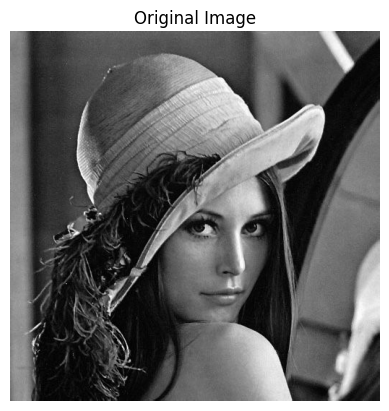

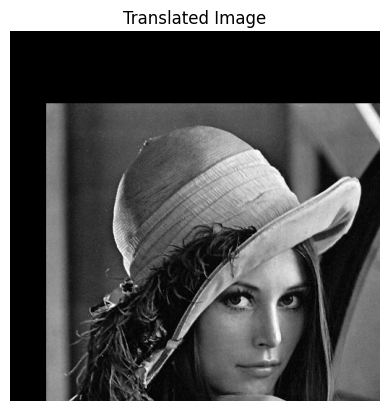

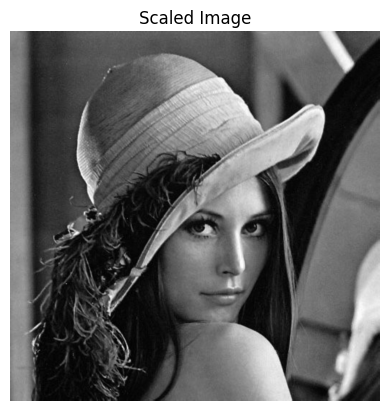

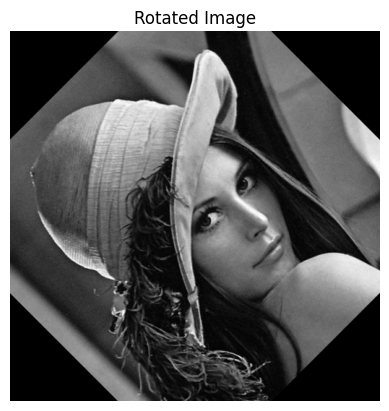

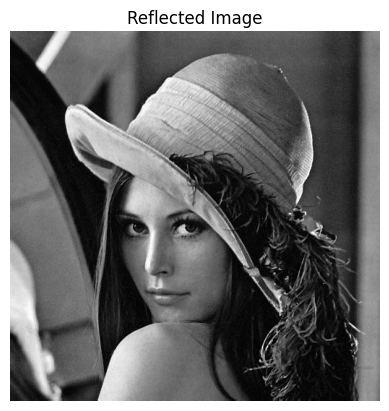

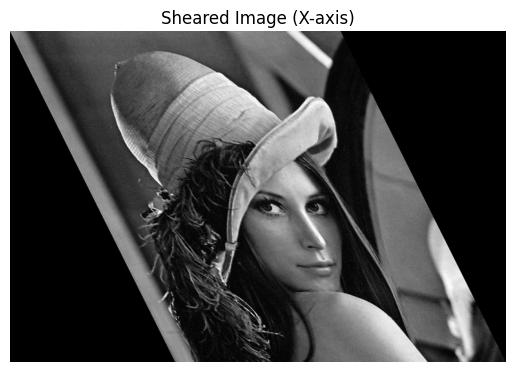

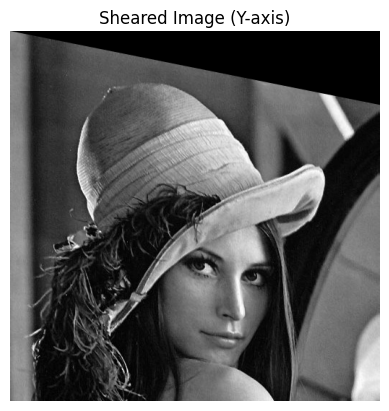

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image = cv2.imread('sample_data/CV lab1 pic.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib

# Display the image
def show_image(img, title="Image"):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(image_rgb, "Original Image")

# Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, matrix, (cols, rows))

translated_image = translate_image(image_rgb, 50, 100)
show_image(translated_image, "Translated Image")

# Image Scaling
def scale_image(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled_image = scale_image(image_rgb, 1.5, 1.5)
show_image(scaled_image, "Scaled Image")

# Image Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, matrix, (cols, rows))

rotated_image = rotate_image(image_rgb, 45)
show_image(rotated_image, "Rotated Image")

# Image Reflection
reflected_image = cv2.flip(image_rgb, 1)  # Flip horizontally
show_image(reflected_image, "Reflected Image")

# Image Shearing (x-axis)
def shear_image(img, shear_factor):
    rows, cols = img.shape[:2]
    matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv2.warpAffine(img, matrix, (cols + int(rows * shear_factor), rows))

sheared_image_x = shear_image(image_rgb, 0.5)
show_image(sheared_image_x, "Sheared Image (X-axis)")

# Shearing Function along Y-axis
def shear_image_y(image, shear_factor):
    height, width = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared_image

# Shear the image along Y-axis
sheared_image_y = shear_image_y(image_rgb, 0.2)
# Display the sheared image along Y-axis
plt.imshow(sheared_image_y)
plt.title("Sheared Image (Y-axis)")
plt.axis("off")
plt.show()
